#Bibliotecas

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets

import ast
import numpy as np
import pandas as pd
import seaborn as sns
from keras import models
from keras import layers
from keras import optimizers
from datetime import datetime
from keras import regularizers
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.metrics import mean_squared_logarithmic_error

plt.style.use('fivethirtyeight')

# Código

## Verificando os dados

In [133]:
treino = pd.read_csv("./train.csv")
teste = pd.read_csv("./test.csv")

In [100]:
treino.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Analisando e limpando os dados

In [101]:
#Analisando o formado dos dados
treino.shape, teste.shape

((3000, 23), (4398, 22))

In [102]:
#Analisando os nomes das colunas do dataframe
list(treino.columns)

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue']

In [103]:
#Analisando os tipos de dados
treino.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [104]:
#Alisando se há algum valor nulo
treino.isna().any()

id                       False
belongs_to_collection     True
budget                   False
genres                    True
homepage                  True
imdb_id                  False
original_language        False
original_title           False
overview                  True
popularity               False
poster_path               True
production_companies      True
production_countries      True
release_date             False
runtime                   True
spoken_languages          True
status                   False
tagline                   True
title                    False
Keywords                  True
cast                      True
crew                      True
revenue                  False
dtype: bool

In [105]:
#Analisando a quantidade de dados nulos
treino.isna().sum()
#

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [ ]:
#excluir tagline, Keyword, crew, belongs_to_collection

In [106]:
#Conferindo se hé dados duplicado
treino.duplicated().sum()

0

In [107]:
#Retirando algumas linhas com dados faltantes
treino.dropna(axis=0, subset=['genres', 'overview','poster_path','production_countries', 'runtime','spoken_languages', 'cast', 'crew'],inplace = True)

In [108]:
#Conferindo as mudanças
treino.shape

(2911, 23)

In [146]:
#
treino['runtime'].value_counts()

90.0     100
100.0     99
105.0     91
95.0      89
98.0      85
        ... 
220.0      1
60.0       1
53.0       1
185.0      1
182.0      1
Name: runtime, Length: 139, dtype: int64

In [ ]:
#
treino['popularity'].value_counts()

In [ ]:
treino.sort_values(by='popularity',ascending=False)

In [109]:
#Conferindo o que havia na coluna de poster
treino['poster_path'].value_counts()

/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg    1
/oudmrV1WljSJMpgwq6K4VzbIMMK.jpg    1
/kysrhFoRGtZlXWQyDGMEiLF1aO8.jpg    1
/jY5DEgyMmHUh4AbWTu6pOb5g7vk.jpg    1
/fkURS96D2ceuocZIBuyiIBGHilF.jpg    1
                                   ..
/skRvltgHJXnFRMfZNOiID6o4UQn.jpg    1
/b8uBcz6CgXOUsZhf2Y4RLHCwk19.jpg    1
/zCREx8trzejNieDLUsRuwLU0cS3.jpg    1
/c03bIFoCbbtC4uLcTb03t1Xgv3K.jpg    1
/cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg    1
Name: poster_path, Length: 2911, dtype: int64

In [110]:
#Conferindo o que havia na coluna de homepage
treino['homepage'].value_counts()

http://www.transformersmovie.com/           4
http://www.thehobbit.com/                   2
http://www.lordoftherings.net/              2
http://sonyclassics.com/whiplash/           1
http://sh-sh.ru/                            1
                                           ..
http://admiralfilm.ru/                      1
http://www.jackreachermovie.com/            1
http://www.sleepdealer.com/                 1
http://www.popperspenguins.com/main.html    1
http://www.abductionthefilm.com/            1
Name: homepage, Length: 922, dtype: int64

In [111]:
#Conferindo o que havia na coluna de status
treino['status'].value_counts()

Released    2908
Rumored        3
Name: status, dtype: int64

In [ ]:
#Conferindo o que havia na coluna de 
treino['spoken_languages'].value_counts()

In [137]:
#C
treino['imdb_id'].value_counts()

tt2637294    1
tt0120841    1
tt0116830    1
tt3079380    1
tt4172430    1
            ..
tt0114681    1
tt0369672    1
tt2350496    1
tt0145681    1
tt1600195    1
Name: imdb_id, Length: 3000, dtype: int64

In [ ]:
#C
treino['overview'].value_counts()

In [113]:
#Como eram apenas links de imagens e todos eram diferente foi decidido excluir essa coluna
treino.drop('poster_path', axis=1, inplace=True)

In [140]:
#Como eram apenas links e todos eram diferente foi decidido excluir essa coluna
treino.drop('homepage', axis=1, inplace=True)

In [139]:
#Como tinham apenas 3 filmes não lançados foi decidido excluir essa coluna
treino.drop('status', axis=1, inplace=True)

In [ ]:
#Como eram apenas 
treino.drop('spoken_languages', axis=1, inplace=True)

In [116]:
#Conferindo as mudanças
treino.shape

(2911, 20)

In [117]:
#Conferindo o que havia na coluna de status
treino['genres'].value_counts()

[{'id': 18, 'name': 'Drama'}]                                                                                                                                                256
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                               178
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                              102
[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]                                                                                                              86
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}]                                                                                                                   82
                                                                                                                   

In [118]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df
        
treino = text_to_dict(treino)
teste = text_to_dict(teste)

In [119]:
print('Number of genres')
lista_genero = list(treino['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
Counter([i for j in lista_genero for i in j]).most_common()

Number of genres


[('Drama', 1489),
 ('Comedy', 995),
 ('Thriller', 779),
 ('Action', 726),
 ('Romance', 554),
 ('Crime', 461),
 ('Adventure', 431),
 ('Horror', 300),
 ('Science Fiction', 281),
 ('Family', 252),
 ('Fantasy', 228),
 ('Mystery', 223),
 ('Animation', 137),
 ('History', 129),
 ('War', 100),
 ('Music', 97),
 ('Documentary', 78),
 ('Western', 42),
 ('Foreign', 26),
 ('TV Movie', 1)]

In [120]:
for i, e in enumerate(treino['genres'][:10]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
5 [{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]
6 [{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]
7 [{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}]
8 [{'id': 18, 'name': 'Drama'}]
9 [{'id': 35, 'name': 'Comedy'}]


In [121]:
print('Number of genres in films')
treino['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    944
3    879
1    570
4    383
5    111
6     21
7      3
Name: genres, dtype: int64

In [122]:
# text =''
# generos = set({})
# for linha in treino.genres:
#     if type(linha) == str:
#         text += linha

# linhas = text.split('{')
# for i in linhas:
#     x = i.find('name')
#     y = i.find('}')
#     texto = i[x+8:y-1]
#     generos.add(texto)

# print(generos)

## Manipulando os dados

In [123]:
# oq eu falei é o IDEAL é vc tirar de dentro do texto e criar uma coluna binária pra cada gênero
# e ai vc marca se é 0 ou 1
# pq é isso q tu vai usar pra treinar o modelo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


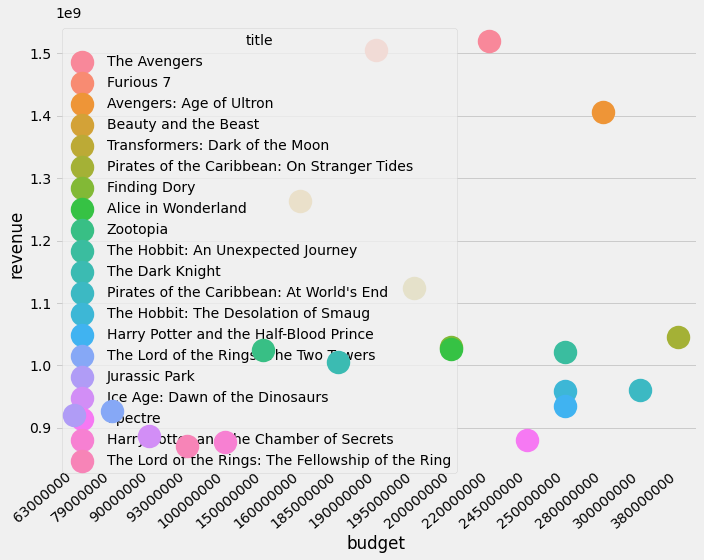

In [124]:
plt.figure(figsize=(10,8))

treino = treino.sort_values(by='revenue', ascending=False)
treino2 = treino.head(20)
ax= sns.pointplot(treino2['budget'], treino2['revenue'], hue= treino2['title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha= "right")
plt.tight_layout()
plt.show()


# Submissão

In [125]:
#https://www.kaggle.com/c/tmdb-box-office-prediction/overview

#Teste

In [126]:
#print('Number of genres in films')
# treino['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

In [127]:
# dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
#                 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

# def text_to_dict(df):
#     for column in dict_columns:
#         df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
#     return df
        
# dfx = text_to_dict(treino)
# for col in dict_columns:
#        treino[col]=dfx[col]

In [128]:
# collections= treino['belongs_to_collection'].apply(lambda x : x[0]['name'] if x!= {} else '?').value_counts()[1:15]
# plt.figure(figsize=(8,8))
# sns.barplot(collections,collections.index)
# plt.show()

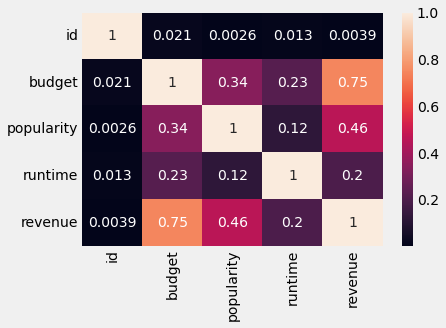

In [129]:
#verificando correlações
corr = treino.corr()
sns.heatmap(corr, annot=True)

# Testando funções

In [130]:
#treino.sort_values(by='budget',ascending=False)

In [131]:
#Retirando linhas com dados faltantes
#linha axis=0 / coluna axis=1
#linha por linha ->
#treino.dropna(axis=0, subset=['genres', 'overview','poster_path','production_countries', 'runtime','spoken_languages', 'cast', 'crew'],inplace = True)

In [132]:
#treino.sort_values(by='popularity',ascending=False)